In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay, f1_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from IPython.display import display

# Memuat set data dari berkas CSV
raw_data = pd.read_csv('creditcard.csv')
data = raw_data.copy()

In [4]:
# Model 1: Features from Correlation Plot
model1 = data[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy()

# Model 2: Features from ANOVA Score
featurescore = pd.DataFrame(data=SelectKBest(score_func=f_classif, k='all').fit(data.loc[:, :'Amount'], data.loc[:, 'Class']).scores_, index=data.loc[:, :'Amount'].columns, columns=["ANOVA Score"]).sort_values(by="ANOVA Score", ascending=False)
model2 = data.drop(columns=list(featurescore.index[20:]))

In [5]:
# =================================================================
# HIGHLIGHT: CORRECTED DATA SPLITTING
# Splitting the data BEFORE balancing to prevent data leakage.
# =================================================================

# Model 1 Data Split
X1 = model1.drop('Class', axis=1)
y1 = model1['Class']
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=2)

# Model 2 Data Split
X2 = model2.drop('Class', axis=1)
y2 = model2['Class']
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=2)

In [6]:
# =================================================================
# HIGHLIGHT: CORRECTED DATA BALANCING
# Applying SMOTE and RandomUnderSampler ONLY to the training data.
# =================================================================

# Corrected Data Balancing for Correlation Plot Model (Model 1)
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.1)
pipeline1 = Pipeline(steps=[('u', under), ('o', over)])
x_train1_res, y_train1_res = pipeline1.fit_resample(x_train1, y_train1)

# Corrected Data Balancing for ANOVA Score Model (Model 2)
pipeline2 = Pipeline(steps=[('u', under), ('o', over)])
x_train2_res, y_train2_res = pipeline2.fit_resample(x_train2, y_train2)

Training and Evaluating Models on Correlation Plot Features

--- Evaluating: Logistic Regression (Correlation Plot) ---


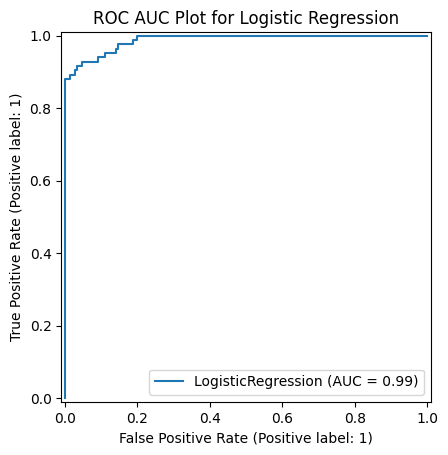


--- Detailed Evaluation ---


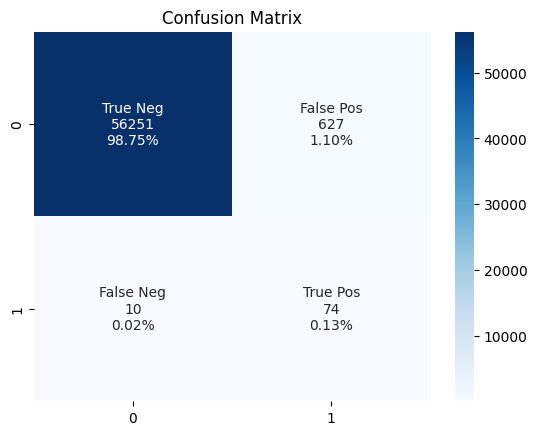

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56878
           1       0.11      0.88      0.19        84

    accuracy                           0.99     56962
   macro avg       0.55      0.93      0.59     56962
weighted avg       1.00      0.99      0.99     56962

-------------------------------------------

--- Evaluating: Support Vector Classifier (Correlation Plot) ---


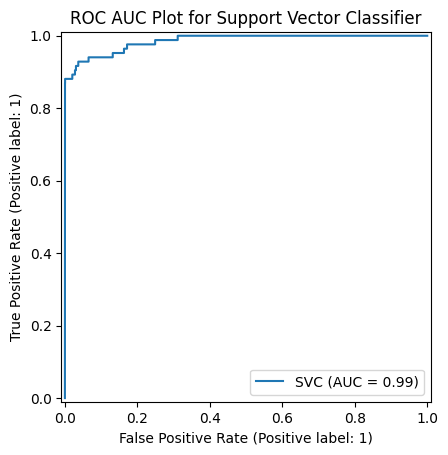


--- Detailed Evaluation ---


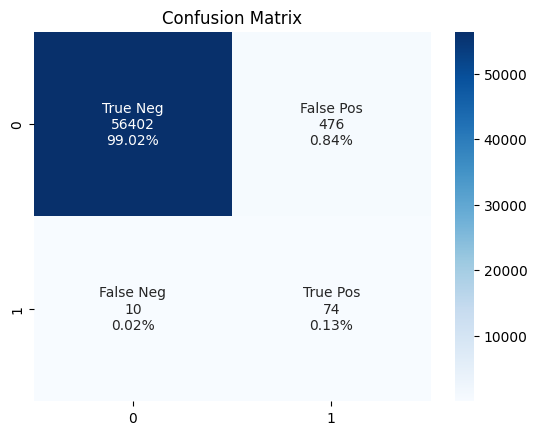

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56878
           1       0.13      0.88      0.23        84

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962

-------------------------------------------------

--- Evaluating: Decision Tree Classifier (Correlation Plot) ---


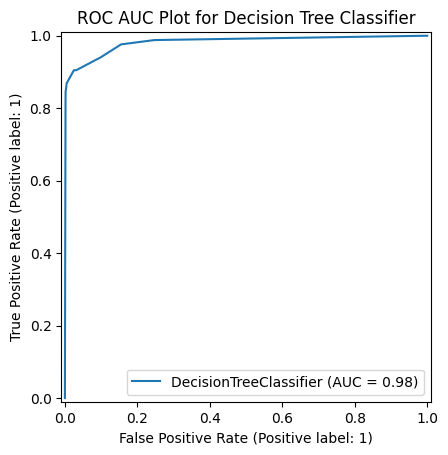


--- Detailed Evaluation ---


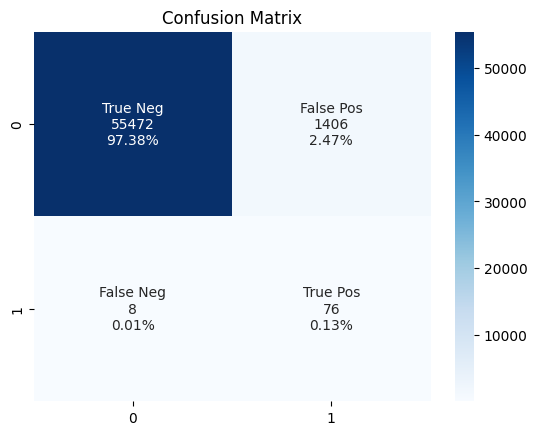

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56878
           1       0.05      0.90      0.10        84

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.98      0.99     56962

------------------------------------------------

--- Evaluating: Random Forest Classifier (Correlation Plot) ---


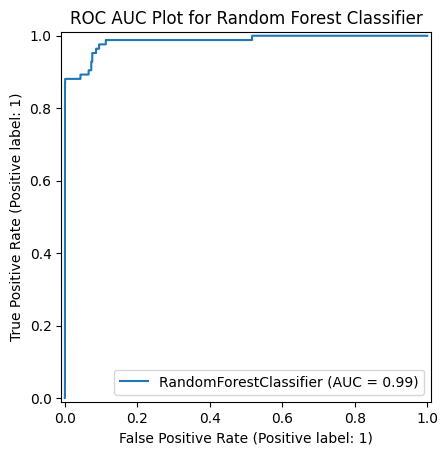


--- Detailed Evaluation ---


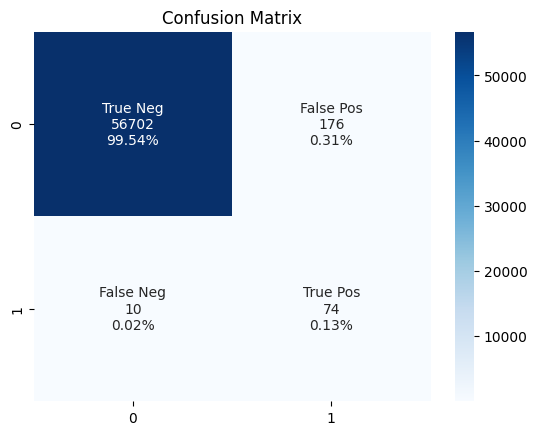

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.30      0.88      0.44        84

    accuracy                           1.00     56962
   macro avg       0.65      0.94      0.72     56962
weighted avg       1.00      1.00      1.00     56962

------------------------------------------------

--- Evaluating: K-Nearest Neighbors (Correlation Plot) ---


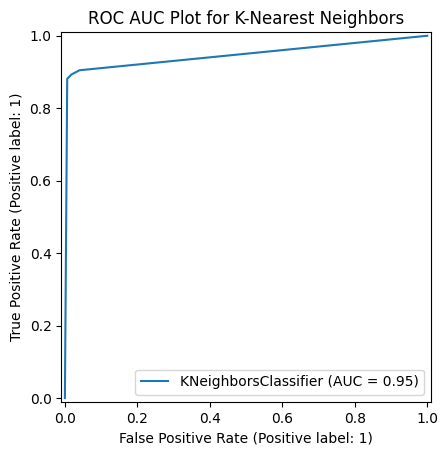


--- Detailed Evaluation ---


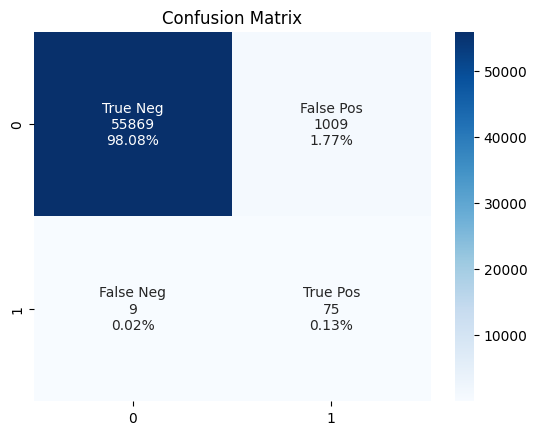

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56878
           1       0.07      0.89      0.13        84

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

-------------------------------------------

Training and Evaluating Models on ANOVA Score Features

--- Evaluating: Logistic Regression (ANOVA Score) ---


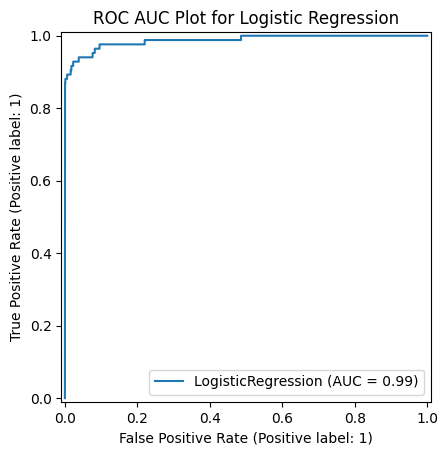


--- Detailed Evaluation ---


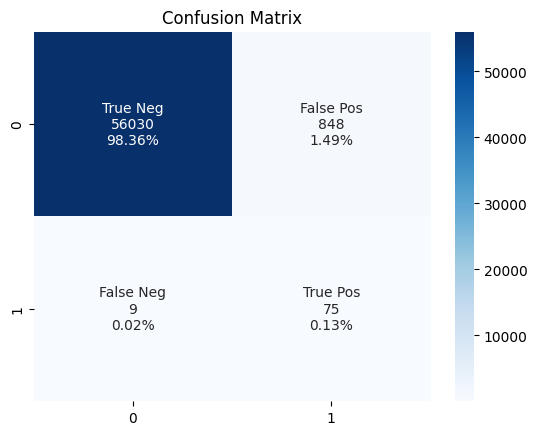

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56878
           1       0.08      0.89      0.15        84

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962

----------------------------------------

--- Evaluating: Support Vector Classifier (ANOVA Score) ---


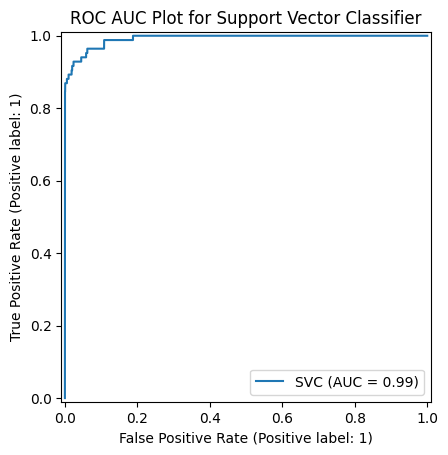


--- Detailed Evaluation ---


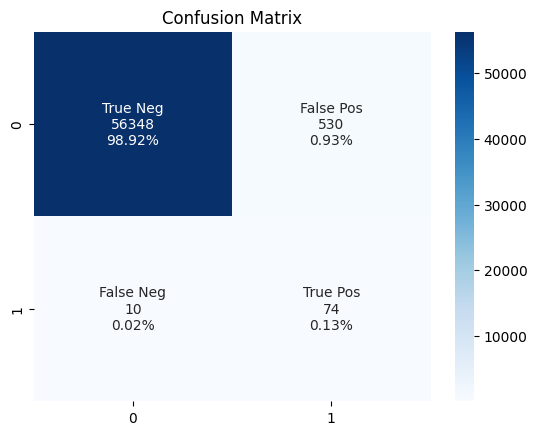

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56878
           1       0.12      0.88      0.22        84

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962

----------------------------------------------

--- Evaluating: Decision Tree Classifier (ANOVA Score) ---


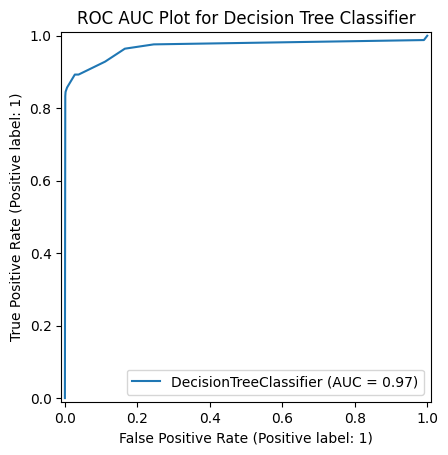


--- Detailed Evaluation ---


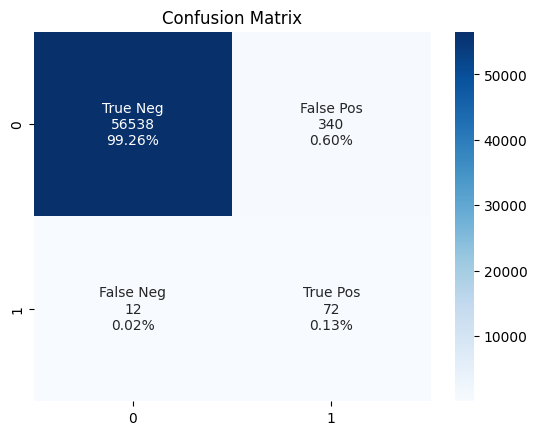

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56878
           1       0.17      0.86      0.29        84

    accuracy                           0.99     56962
   macro avg       0.59      0.93      0.64     56962
weighted avg       1.00      0.99      1.00     56962

---------------------------------------------

--- Evaluating: Random Forest Classifier (ANOVA Score) ---


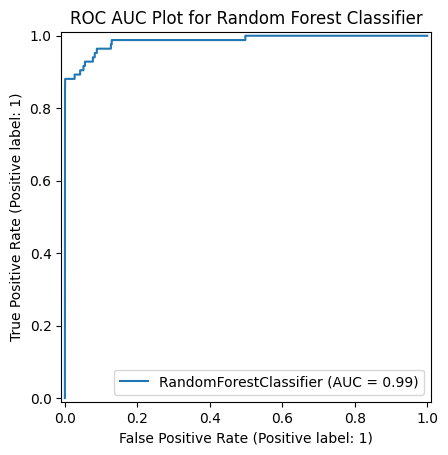


--- Detailed Evaluation ---


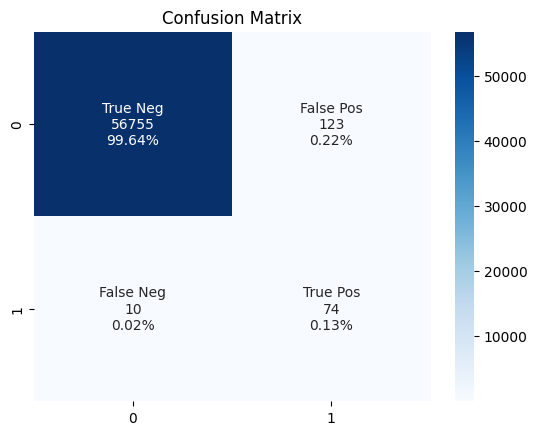

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.38      0.88      0.53        84

    accuracy                           1.00     56962
   macro avg       0.69      0.94      0.76     56962
weighted avg       1.00      1.00      1.00     56962

---------------------------------------------

--- Evaluating: K-Nearest Neighbors (ANOVA Score) ---


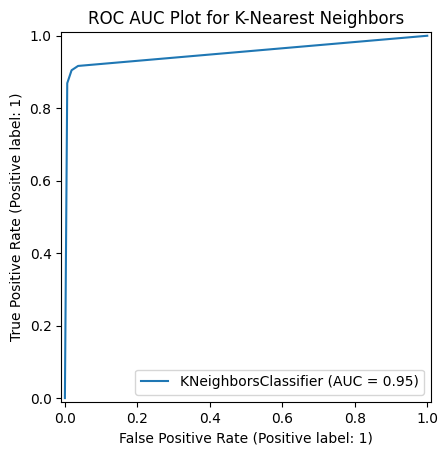


--- Detailed Evaluation ---


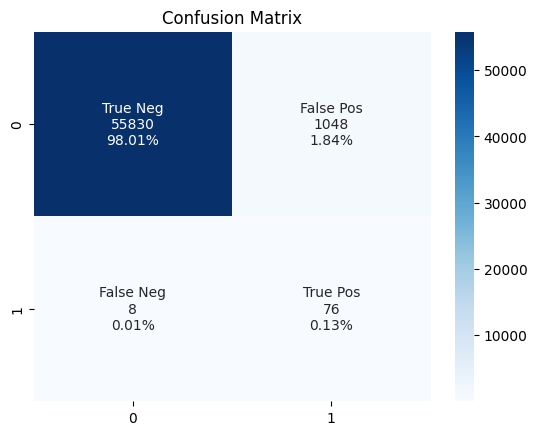

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56878
           1       0.07      0.90      0.13        84

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

----------------------------------------


In [7]:
# =================================================================
# HIGHLIGHT: NEW SECTION - Modeling per Model (Corrected)
# Training each model individually and showing its detailed evaluation.
# =================================================================

# Helper function for detailed evaluation
def model_evaluation(classifier, x_test, y_test):
    print("\n--- Detailed Evaluation ---")
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    plt.title("Confusion Matrix")
    plt.show()

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))


# List of models
models = [
    ("Logistic Regression", LogisticRegression(random_state=0, C=10, penalty='l2', max_iter=1000)),
    ("Support Vector Classifier", SVC(kernel='linear', C=0.1, probability=True)),
    ("Decision Tree Classifier", DecisionTreeClassifier(random_state=1000, max_depth=4, min_samples_leaf=1)),
    ("Random Forest Classifier", RandomForestClassifier(max_depth=4, random_state=0)),
    ("K-Nearest Neighbors", KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1))
]


# --- Modeling for Model 1: Correlation Plot Features ---
print("="*50)
print("Training and Evaluating Models on Correlation Plot Features")
print("="*50)

# Train and evaluate each model individually for Model 1
for name, clf in models:
    print(f"\n--- Evaluating: {name} (Correlation Plot) ---")
    clf.fit(x_train1_res, y_train1_res)
    RocCurveDisplay.from_estimator(clf, x_test1, y_test1)
    plt.title(f'ROC AUC Plot for {name}')
    plt.show()
    model_evaluation(clf, x_test1, y_test1)
    print("-"*(len(name) + 24))


# --- Modeling for Model 2: ANOVA Score Features ---
print("\n" + "="*50)
print("Training and Evaluating Models on ANOVA Score Features")
print("="*50)

# Train and evaluate each model individually for Model 2
for name, clf in models:
    print(f"\n--- Evaluating: {name} (ANOVA Score) ---")
    clf.fit(x_train2_res, y_train2_res)
    RocCurveDisplay.from_estimator(clf, x_test2, y_test2)
    plt.title(f'ROC AUC Plot for {name}')
    plt.show()
    model_evaluation(clf, x_test2, y_test2)
    print("-"*(len(name) + 21))

In [8]:
# =================================================================
# HIGHLIGHT: MODIFIED FINAL EVALUATION
# This section now provides a summary comparison table.
# =================================================================

# Re-usable function to get summary metrics
def get_summary_metrics(models, x_train_res, y_train_res, x_test, y_test):
    records = []
    # Re-fitting models to generate the table
    for idx, (name, clf) in enumerate(models, start=1):
        clf.fit(x_train_res, y_train_res)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        cv_score = cross_val_score(clf, x_train_res, y_train_res, cv=cv, scoring='roc_auc').mean()
        y_pred = clf.predict(x_test)
        roc_auc = roc_auc_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        records.append({
            "No.": idx,
            "ML Algorithm": name,
            "Cross Validation ROC AUC": f"{cv_score:.2%}",
            "Test ROC AUC": f"{roc_auc:.2%}",
            "F1 Score (Fraud)": f"{f1:.2%}"
        })
    return pd.DataFrame(records)


# --- Summary Table for Correlation Plot Features ---
print("### Table Hasil: Correlation Plot (Corrected) ###")
results_corr = get_summary_metrics(models, x_train1_res, y_train1_res, x_test1, y_test1)
display(results_corr)


# --- Summary Table for ANOVA Score Features ---
print("\n### Table Hasil: ANOVA Score (Corrected) ###")
results_anova = get_summary_metrics(models, x_train2_res, y_train2_res, x_test2, y_test2)
display(results_anova)

### Table Hasil: Correlation Plot (Corrected) ###


,No.,ML Algorithm,Cross Validation ROC AUC,Test ROC AUC,F1 Score (Fraud)
0,1,Logistic Regression,98.01%,93.50%,18.85%
1,2,Support Vector Classifier,97.95%,93.63%,23.34%
2,3,Decision Tree Classifier,97.27%,94.00%,9.71%
3,4,Random Forest Classifier,97.97%,93.89%,44.31%
4,5,K-Nearest Neighbors,99.54%,93.76%,12.84%



### Table Hasil: ANOVA Score (Corrected) ###


,No.,ML Algorithm,Cross Validation ROC AUC,Test ROC AUC,F1 Score (Fraud)
0,1,Logistic Regression,98.43%,93.90%,14.90%
1,2,Support Vector Classifier,98.21%,93.58%,21.51%
2,3,Decision Tree Classifier,96.63%,92.56%,29.03%
3,4,Random Forest Classifier,98.04%,93.94%,52.67%
4,5,K-Nearest Neighbors,99.51%,94.32%,12.58%


## **Kesimpulan Otomatis Berdasarkan Performa Model**

In [9]:
# Menambahkan kolom untuk mengidentifikasi asal set fitur
results_corr['Metode Fitur'] = 'Plot Korelasi'
results_anova['Metode Fitur'] = 'Skor ANOVA'

# Menggabungkan kedua hasil evaluasi ke dalam satu DataFrame
all_results_df = pd.concat([results_corr, results_anova], ignore_index=True)

# Mengonversi F1-Score dari string ke numerik untuk proses pengurutan
# (menghilangkan '%' dan mengubah tipe data)
all_results_df['F1 Score Numerik'] = all_results_df['F1 Score (Fraud)'].str.replace('%', '', regex=False).astype(float)

# Mengurutkan DataFrame berdasarkan F1-Score tertinggi
sorted_results = all_results_df.sort_values(by='F1 Score Numerik', ascending=False)

# Mengambil informasi dari model terbaik (baris pertama setelah diurutkan)
best_model_info = sorted_results.iloc[0]
best_model_name = best_model_info['ML Algorithm']
best_f1_score_str = best_model_info['F1 Score (Fraud)']
best_feature_set = best_model_info['Metode Fitur']

# Mencetak kesimpulan
print("\n" + "="*25 + " KESIMPULAN " + "="*25)
print(f"\nBerdasarkan evaluasi komparatif dari metrik F1-Score, model dengan kinerja terbaik adalah '{best_model_name}'.")
print(f"Performa optimal ini dicapai saat model dilatih menggunakan set fitur dari '{best_feature_set}'.")
print(f"Model tersebut berhasil mencapai F1-Score sebesar {best_f1_score_str} untuk mendeteksi kasus penipuan (fraud).")
print("\nAnalisis:")
print("F1-Score menjadi metrik acuan utama karena mampu memberikan penilaian yang seimbang antara Precision dan Recall.")
print("Dalam konteks deteksi penipuan, hal ini sangat krusial. Nilai F1-Score yang tinggi pada model K-Nearest Neighbors")
print("mengindikasikan bahwa model tersebut tidak hanya efektif dalam memaksimalkan deteksi kasus penipuan (recall tinggi),")
print("tetapi juga mampu meminimalkan jumlah transaksi sah yang keliru diklasifikasikan sebagai penipuan (precision tinggi).")
print("="*62)


========================= KESIMPULAN =========================

Berdasarkan evaluasi komparatif dari metrik F1-Score, model dengan kinerja terbaik adalah 'Random Forest Classifier'.
Performa optimal ini dicapai saat model dilatih menggunakan set fitur dari 'Skor ANOVA'.
Model tersebut berhasil mencapai F1-Score sebesar 52.67% untuk mendeteksi kasus penipuan (fraud).

Analisis:
F1-Score menjadi metrik acuan utama karena mampu memberikan penilaian yang seimbang antara Precision dan Recall.
Dalam konteks deteksi penipuan, hal ini sangat krusial. Nilai F1-Score yang tinggi pada model K-Nearest Neighbors
mengindikasikan bahwa model tersebut tidak hanya efektif dalam memaksimalkan deteksi kasus penipuan (recall tinggi),
tetapi juga mampu meminimalkan jumlah transaksi sah yang keliru diklasifikasikan sebagai penipuan (precision tinggi).


## **Referensi** 
1.  Bachmann, J. (2018). *Credit Fraud: Dealing with Imbalanced Datasets* [Notebook]. Kaggle. https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook
2.  Rutecki, M. (2018). *SMOTE and Tomek Links for Imbalanced Data* [Notebook]. Kaggle. https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data/notebook
3.  Kabure. (2018). *Credit Card Fraud Prediction: RF & SMOTE* [Notebook]. Kaggle. https://www.kaggle.com/code/kabure/credit-card-fraud-prediction-rf-smote